Impoting libraries and creating sample.csv

In [36]:
import pandas as pd
import numpy as np
from pathlib import Path

root = Path("..")
file_path = root / "data" / "raw" / "yellow_tripdata_2019-01.csv"
sample_path = root / "data" / "raw" / "sample.csv"

df = pd.read_csv(file_path, nrows=100000)
df.to_csv(path_or_buf=sample_path, index=False)

Basic info

In [37]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.00,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.00,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.00,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.00,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.00,0.3,55.55,NaN
5,2,2018-11-28 16:25:49,2018-11-28 16:28:26,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,5.76,0.3,13.31,NaN
6,2,2018-11-28 16:29:37,2018-11-28 16:33:43,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.00,0.3,55.55,NaN
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,N,163,229,1,6.5,0.5,0.5,1.25,0.00,0.3,9.05,NaN
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,N,229,7,1,13.5,0.5,0.5,3.70,0.00,0.3,18.50,NaN
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,N,141,234,1,10.0,0.5,0.5,1.70,0.00,0.3,13.00,NaN


In [38]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.0
mean,1.670890,1.684910,3.456495,1.071870,155.674210,152.539110,1.39595,13.561975,0.309734,0.494550,1.730024,0.325044,0.299058,16.731960,0.0
std,0.541608,1.279213,3.985196,0.816732,70.292494,74.651467,0.51720,12.553545,0.262226,0.057361,2.669896,1.592216,0.022828,14.815232,NaN
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,-300.000000,-1.000000,-0.500000,0.000000,-10.500000,-0.300000,-300.300000,0.0
25%,1.000000,1.000000,1.100000,1.000000,100.000000,87.000000,1.00000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000,0.0
50%,2.000000,1.000000,2.010000,1.000000,151.000000,151.000000,1.00000,9.500000,0.500000,0.500000,1.080000,0.000000,0.300000,11.880000,0.0
75%,2.000000,2.000000,4.170000,1.000000,231.000000,231.000000,2.00000,16.500000,0.500000,0.500000,2.350000,0.000000,0.300000,19.560000,0.0
max,4.000000,8.000000,128.730000,99.000000,265.000000,265.000000,4.00000,496.500000,17.500000,0.500000,100.000000,75.000000,0.300000,500.550000,0.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   RatecodeID             100000 non-null  int64  
 6   store_and_fwd_flag     100000 non-null  object 
 7   PULocationID           100000 non-null  int64  
 8   DOLocationID           100000 non-null  int64  
 9   payment_type           100000 non-null  int64  
 10  fare_amount            100000 non-null  float64
 11  extra                  100000 non-null  float64
 12  mta_tax                100000 non-null  float64
 13  tip_amount             100000 non-null  float64
 14  tolls_amount           100000 non-nul

In [40]:
print(df.isna().sum())

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag           0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     99999
dtype: int64


Cleaning 


In [41]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
cols_to_cat = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'passenger_count']
df[cols_to_cat] = df[cols_to_cat].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  category      
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  category      
 4   trip_distance          100000 non-null  float64       
 5   RatecodeID             100000 non-null  category      
 6   store_and_fwd_flag     100000 non-null  category      
 7   PULocationID           100000 non-null  category      
 8   DOLocationID           100000 non-null  category      
 9   payment_type           100000 non-null  category      
 10  fare_amount            100000 non-null  float64       
 11  extra                  100000 non-null  float64       
 12  mta_tax                100000 non-null  float

In [42]:
(df == 0).sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count           1284
trip_distance             1028
RatecodeID                   0
store_and_fwd_flag           0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                 53
extra                    38055
mta_tax                    852
tip_amount               42157
tolls_amount             95086
improvement_surcharge       48
total_amount                30
congestion_surcharge         1
dtype: int64

In [ ]:
df = df[(df['trip_distance'] > 0)
         & (df['passenger_count'] != 0)
           & (df['fare_amount'] > 0)
            &(df['tpep_pickup_datetime'] >= '2019-01-01')] # deleting impossible rides(distance, passenger count and price) and leaving data starting from Jan 1 2019

In [44]:
df.congestion_surcharge = df.congestion_surcharge.fillna(0) # replacing NaN with 0s, because there should be no missing info

In [45]:
df['trip_duration_min'] = ((df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.total_seconds() / 60)
df['tip_percent'] = ( df.tip_amount / df.fare_amount) * 100
column_order = ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_duration_min',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tip_percent', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge']
df = df[column_order]
df.head(10)
# added 2 new columns and changed order to a more logical


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_duration_min,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tip_percent,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,6.666667,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,23.571429,0.0,0.3,9.95,0.0
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,19.200000,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,7.142857,0.0,0.3,16.30,0.0
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,7.150000,1,1.3,1,N,163,229,1,6.5,0.5,0.5,1.25,19.230769,0.0,0.3,9.05,0.0
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,13.633333,1,3.7,1,N,229,7,1,13.5,0.5,0.5,3.70,27.407407,0.0,0.3,18.50,0.0
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,12.000000,2,2.1,1,N,141,234,1,10.0,0.5,0.5,1.70,17.000000,0.0,0.3,13.00,0.0
10,1,2019-01-01 00:24:04,2019-01-01 00:47:06,23.033333,2,2.8,1,N,246,162,1,15.0,0.5,0.5,3.25,21.666667,0.0,0.3,19.55,0.0
11,1,2019-01-01 00:21:59,2019-01-01 00:28:24,6.416667,1,0.7,1,N,238,151,1,5.5,0.5,0.5,1.70,30.909091,0.0,0.3,8.50,0.0
12,1,2019-01-01 00:45:21,2019-01-01 01:31:05,45.733333,1,8.7,1,N,163,25,1,34.5,0.5,0.5,7.15,20.724638,0.0,0.3,42.95,0.0
13,1,2019-01-01 00:43:19,2019-01-01 01:07:42,24.383333,1,6.3,1,N,224,25,1,21.5,0.5,0.5,5.70,26.511628,0.0,0.3,28.50,0.0
14,1,2019-01-01 00:58:24,2019-01-01 01:15:18,16.900000,1,2.7,1,N,141,234,1,13.0,0.5,0.5,1.00,7.692308,0.0,0.3,15.30,0.0


Saving clean data to .parquet

In [46]:
path_to_parquet = root / "data" / "processed" / "taxi_clean.parquet"
df.to_parquet(path_to_parquet, index=False)

Aggregation
and
Grouping


In [113]:
total_amount_by_pulocationid = pd.DataFrame(df.groupby(by='PULocationID').total_amount.sum())
mean_check_by_hour = df.set_index('tpep_pickup_datetime')[['total_amount']].resample('H').mean(numeric_only=True)
# mean_check_by_hour.index = mean_check_by_hour.index.time
print(total_amount_by_pulocationid, '\n')
print(mean_check_by_hour)

              total_amount
PULocationID              
1                   338.21
3                    69.20
4                  7976.87
6                    27.32
7                  6381.30
...                    ...
261               10646.17
262               14254.32
263               32399.32
264               22440.37
265                2792.26

[231 rows x 1 columns] 

                      total_amount
tpep_pickup_datetime              
2019-01-01 00:00:00      16.069867
2019-01-01 01:00:00      16.343422
2019-01-01 02:00:00      16.308692
2019-01-01 03:00:00      16.056307
2019-01-01 04:00:00      16.986294
2019-01-01 05:00:00      19.044991
2019-01-01 06:00:00      19.980517
2019-01-01 07:00:00      19.494694
2019-01-01 08:00:00      19.831538
2019-01-01 09:00:00      17.699899
2019-01-01 10:00:00      17.102340
2019-01-01 11:00:00      15.525736
2019-01-01 12:00:00      15.885581
2019-01-01 13:00:00      15.223312
2019-01-01 14:00:00      16.885455


C:\Users\DE-YARP\AppData\Local\Temp\ipykernel_19228\4107785164.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_amount_by_pulocationid = pd.DataFrame(df.groupby(by='PULocationID').total_amount.sum())
C:\Users\DE-YARP\AppData\Local\Temp\ipykernel_19228\4107785164.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  mean_check_by_hour = df.set_index('tpep_pickup_datetime')[['total_amount']].resample('H').mean(numeric_only=True)


Saving evrything to .parquet

In [104]:
path_agg_pulocationid = root / "data" / "processed" / "total_amount_by_pulocationid.parquet"
path_agg_check_by_hour = root / "data" / "processed" / "mean_check_by_hour.parquet"
total_amount_by_pulocationid.to_parquet(path_agg_pulocationid, index=False)
mean_check_by_hour.to_parquet(path_agg_check_by_hour, index=False)

Visualisation

<Axes: xlabel='PULocationID'>

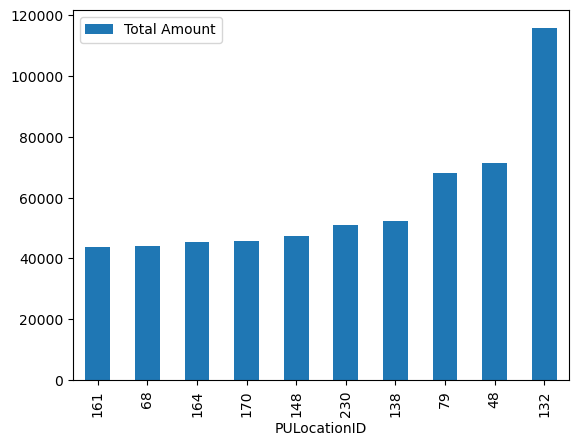

In [102]:
import matplotlib.pyplot as plt
plot_1 = total_amount_by_pulocationid.sort_values(by='total_amount', ascending=False)[:10]
plot_1 = plot_1.rename(columns={'total_amount': 'Total Amount'}).sort_values(by='Total Amount', ascending=True)
plot_1.plot(kind='bar')


<Axes: xlabel='Hour'>

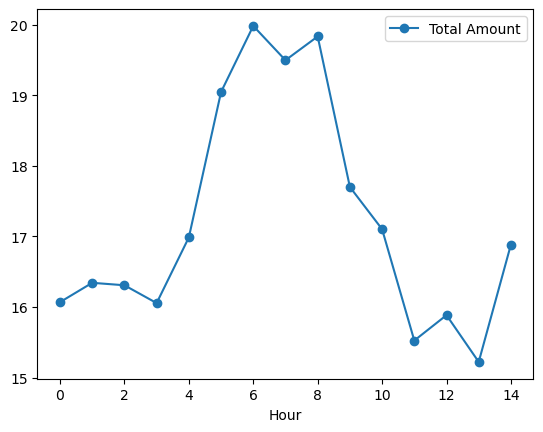

In [114]:
plot_2 = mean_check_by_hour.rename_axis('Hour', axis=0)
plot_2.index = plot_2.index.hour
plot_2 = plot_2.rename(columns={'total_amount': 'Total Amount'})
plot_2.plot(kind='line', marker='o')
